# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

### План работы:

1. [Подготовка данных](#start)

2. [Анализ данных](#Analysis)

3. [Построение и обучение модели](#Model)

4. [Общий вывод](#Conclusion)

<a id="start"></a>
# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings("ignore")

откроем датасеты, сохранив их в датафреймах с соответствующими названиями, а также  посмотрим общую информацию об этих датафреймах

In [2]:
train=pd.read_csv('/datasets/gold_recovery_train.csv') #обучающая выборка
test=pd.read_csv('/datasets/gold_recovery_test.csv') # тестовая выборка
full=pd.read_csv('/datasets/gold_recovery_full.csv') # исходные данные

In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

посмотрим информаию о пропусках в столбцах в процентном соотношении

In [4]:
for col in full.columns:
    missing_full = (full[col].isnull()).mean()
    print ('{} - {:.2f}%'.format(col, missing_full*100))

date - 0.00%
final.output.concentrate_ag - 0.39%
final.output.concentrate_pb - 0.38%
final.output.concentrate_sol - 1.69%
final.output.concentrate_au - 0.38%
final.output.recovery - 8.64%
final.output.tail_ag - 0.37%
final.output.tail_pb - 0.88%
final.output.tail_sol - 1.19%
final.output.tail_au - 0.36%
primary_cleaner.input.sulfate - 7.08%
primary_cleaner.input.depressant - 6.81%
primary_cleaner.input.feed_size - 0.00%
primary_cleaner.input.xanthate - 5.07%
primary_cleaner.output.concentrate_ag - 0.43%
primary_cleaner.output.concentrate_pb - 1.97%
primary_cleaner.output.concentrate_sol - 3.51%
primary_cleaner.output.concentrate_au - 0.43%
primary_cleaner.output.tail_ag - 0.45%
primary_cleaner.output.tail_pb - 0.54%
primary_cleaner.output.tail_sol - 1.55%
primary_cleaner.output.tail_au - 0.44%
primary_cleaner.state.floatbank8_a_air - 0.25%
primary_cleaner.state.floatbank8_a_level - 0.22%
primary_cleaner.state.floatbank8_b_air - 0.25%
primary_cleaner.state.floatbank8_b_level - 0.19%
pri

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [6]:
for col in train.columns:
    missing_train = (train[col].isnull()).mean()
    print ('{} - {:.2f}%'.format(col, missing_train*100))

date - 0.00%
final.output.concentrate_ag - 0.43%
final.output.concentrate_pb - 0.43%
final.output.concentrate_sol - 2.19%
final.output.concentrate_au - 0.42%
final.output.recovery - 9.02%
final.output.tail_ag - 0.39%
final.output.tail_pb - 1.09%
final.output.tail_sol - 0.86%
final.output.tail_au - 0.39%
primary_cleaner.input.sulfate - 7.75%
primary_cleaner.input.depressant - 7.49%
primary_cleaner.input.feed_size - 0.00%
primary_cleaner.input.xanthate - 5.84%
primary_cleaner.output.concentrate_ag - 0.49%
primary_cleaner.output.concentrate_pb - 2.12%
primary_cleaner.output.concentrate_sol - 3.77%
primary_cleaner.output.concentrate_au - 0.49%
primary_cleaner.output.tail_ag - 0.49%
primary_cleaner.output.tail_pb - 0.59%
primary_cleaner.output.tail_sol - 1.67%
primary_cleaner.output.tail_au - 0.49%
primary_cleaner.state.floatbank8_a_air - 0.24%
primary_cleaner.state.floatbank8_a_level - 0.20%
primary_cleaner.state.floatbank8_b_air - 0.24%
primary_cleaner.state.floatbank8_b_level - 0.16%
pri

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [8]:
for col in test.columns:
    missing_test = (test[col].isnull()).mean()
    print ('{} - {:.2f}%'.format(col, missing_test*100))

date - 0.00%
primary_cleaner.input.sulfate - 5.16%
primary_cleaner.input.depressant - 4.85%
primary_cleaner.input.feed_size - 0.00%
primary_cleaner.input.xanthate - 2.83%
primary_cleaner.state.floatbank8_a_air - 0.27%
primary_cleaner.state.floatbank8_a_level - 0.27%
primary_cleaner.state.floatbank8_b_air - 0.27%
primary_cleaner.state.floatbank8_b_level - 0.27%
primary_cleaner.state.floatbank8_c_air - 0.27%
primary_cleaner.state.floatbank8_c_level - 0.27%
primary_cleaner.state.floatbank8_d_air - 0.27%
primary_cleaner.state.floatbank8_d_level - 0.27%
rougher.input.feed_ag - 0.27%
rougher.input.feed_pb - 0.27%
rougher.input.feed_rate - 0.68%
rougher.input.feed_size - 0.38%
rougher.input.feed_sol - 1.14%
rougher.input.feed_au - 0.27%
rougher.input.floatbank10_sulfate - 4.39%
rougher.input.floatbank10_xanthate - 2.10%
rougher.input.floatbank11_sulfate - 0.94%
rougher.input.floatbank11_xanthate - 6.03%
rougher.state.floatbank10_a_air - 0.29%
rougher.state.floatbank10_a_level - 0.27%
rougher.

Мы можем наблюдать нижеследующее:

Датасет full содержит 87 столбцов и 22716 строк. В строках есть пропуски. 

Датасет train содержит 87 столбцов и 16860 строк. В строках также имеются пропуски.

Датасет test содержит 53 столбца и 5856 строк. В строках имеются пропуски. 

Пропуски в вышеуказанных наборах информациии имеются скорее всего потому, что даные значения еще неизвестны и будут измеряться позже.

Рассчитаем эффективность обогащения чернового концентрата rougher.output.recovery из обучающей выборки, предварительно удалив пропуски из столбцов с пропусками.

In [9]:
train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  14287 non-null object
final.output.concentrate_ag                           14282 non-null float64
final.output.concentrate_pb                           14282 non-null float64
final.output.concentrate_sol                          14055 non-null float64
final.output.concentrate_au                           14283 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14287 non-null float64
final.output.tail_pb                                  14173 non-null float64
final.output.tail_sol                                 14279 non-null float64
final.output.tail_au                                  14287 non-null float64
primary_cleaner.input.sulfate                         14261 non-null float64
primary_cleaner.input.depressant             

In [10]:
concentrate_au_column = train['rougher.output.concentrate_au']
feed_au_column = train['rougher.input.feed_au']
tail_au_column = train['rougher.output.tail_au']
input_recovery = train['rougher.output.recovery']
calculated_recovery = concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column / (concentrate_au_column - tail_au_column) * 100
print('Абсолютная средняя ошибка =', mean_absolute_error(input_recovery, calculated_recovery))

Абсолютная средняя ошибка = 1.0512313043960013e-14


Мы видим, что значение MAE имеет очень малое отклонение, а это значит, что расчетное значение rougher.output.recovery совпадает со значением признака.

Удалим пропуски в обучающей и тестовой выборке.

In [11]:
train = train.dropna()
train.isna().mean()

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

In [12]:
test = test.dropna()
test.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


В тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Эти данные будут получены по результатам технологического процесса, эти признаки можно отнести к онлайн метрикам. Остальные признаки исторически известны, соответственно их можно отнести к оффлайн метрикам.

Выделим признаки из тестовой выборки, по которым будет обучаться модель. Признак date не несет смысла для обучающей модели. Для предсказания rougher.output.recovery будут использоватся данные из столюцов этапа rougher. Для вычисления final.output.recovery будут использованы все признаки из тестовой выборки.

In [13]:
features_columns = test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)
print(rougher_features_columns)
print()
print(final_features_columns)

{'rougher.state.floatbank10_a_level', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_xanthate', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_f_level', 'rougher.input.feed_pb', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_d_level', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_d_air', 'rougher.input.floatbank11_sulfate', 'rougher.input.feed_ag', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_c_level'}

{'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank4_b_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_c_level', 'secondary_cleaner.state.floatbank6_a_level', 'primary_cleaner.state.floatbank8_c_level', 'seconda

Визуально рассмотрим  ключевые признаки в обучающей выборке.

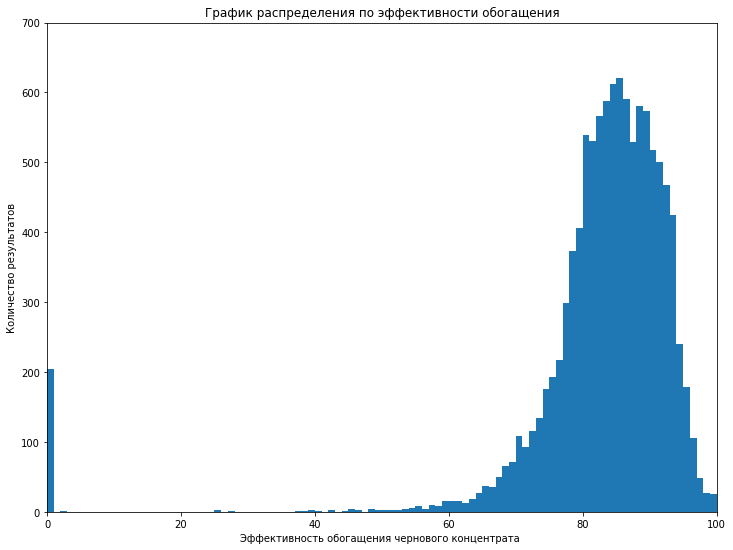

In [14]:
plt.figure(figsize=[12,9])

plt.hist(train['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("График распределения по эффективности обогащения")
plt.show()

Изучим нулевые значения в столбце rougher.output.recovery.

In [15]:
train[train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
51,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
52,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
836,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [16]:
train[train['rougher.output.concentrate_au'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
51,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
52,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
836,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


В полученных данных нет информации о этапе rougher. Удалим эти значения, так как они могут исказить данные.

In [17]:
train = train.drop(train[train['rougher.output.recovery'] == 0].index)
train[train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


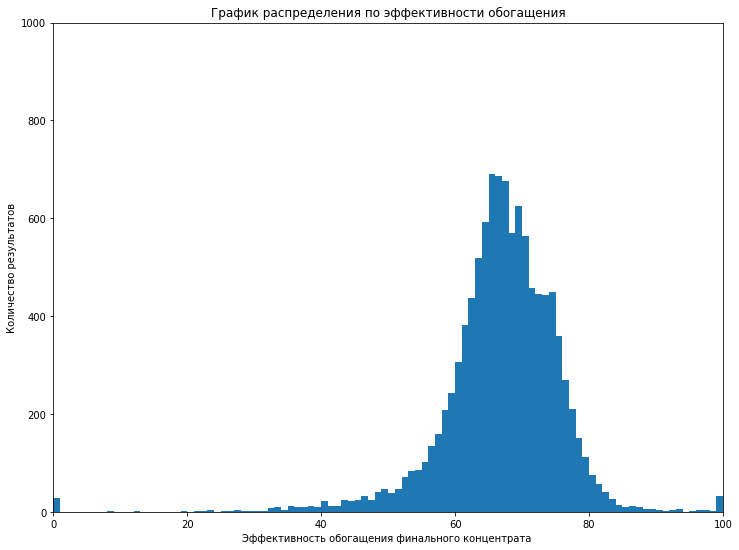

In [18]:
plt.figure(figsize=[12,9])

plt.hist(train['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("График распределения по эффективности обогащения")
plt.show()

In [19]:
train[train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
707,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1354,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1355,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1356,2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1357,2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405


In [20]:
train = train.drop(train[train['final.output.recovery'] == 0].index)
train[train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [21]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  10784 non-null object
final.output.concentrate_ag                           10784 non-null float64
final.output.concentrate_pb                           10784 non-null float64
final.output.concentrate_sol                          10784 non-null float64
final.output.concentrate_au                           10784 non-null float64
final.output.recovery                                 10784 non-null float64
final.output.tail_ag                                  10784 non-null float64
final.output.tail_pb                                  10784 non-null float64
final.output.tail_sol                                 10784 non-null float64
final.output.tail_au                                  10784 non-null float64
primary_cleaner.input.sulfate                         10784 non-null float64
primary_cleaner.input.depressant             

Проверим, есть ли нулевые значения в primary_cleaner.output и secondary_cleaner.output.

In [22]:
train[train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

109

In [23]:
train[train['secondary_cleaner.output.tail_au'] < 1]['secondary_cleaner.output.tail_au'].count()

426

По данным этапам также присутвуют значения равные нулю, но так как они не являются целевыми признаками и не входят в список признаков обучающей модели, оставим их без изменения.

## Выводы

В ходе выполнения первого шага мы сделали нижеледующее.

Нами открыты и изучены файлы, сохранены в соответствующих датафреймах под назваиями full, train, test.

Во всех полученных датафреймах мы обнаружили пропущенные знаачения. 

Пропуски в вышеуказанных наборах информациии имеются скорее всего потому, что даные значения еще неизвестны и будут измеряться позже.

Далее нами рассчитана эффективность обогащения чернового концентрата rougher.output.recovery из обучающей выборки, при этом предварительно мы удалили пропуски из столбцов с пропусками.

Получив значение абсолютной средней ошибки = 1.0512313043960013e-14, нами сделан вывод, что значение MAE имеет очень малое отклонение, поэтому расчетное значение rougher.output.recovery совпадает со значением признака.

Далее мы удалили пропуски в обучающей и тестовой выборке.

Мы обнаружили, что в тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Нами сделан вывод, что эти данные будут получены по результатам технологического процесса, поэтому эти признаки мы отнесли к онлайн метрикам. Остальные признаки исторически известны, соответственно их мы отнесли к оффлайн метрикам.

Также мы выделили признаки из тестовой выборки, по которым будет обучаться модель. Мы обозначили, что признак date не несет смысла для обучающей модели, а также, что для предсказания rougher.output.recovery будут использоватся данные из столюцов этапа rougher, а Для вычисления final.output.recovery будут использованы все признаки из тестовой выборки.

Далее мы визуально рассмотрели ключевые признаки в обучающей выборке и изучили нулевые значения в столбце rougher.output.recovery.

Неподходящие данные были удалены. 

Данные подготовлены к дальнейшему анализу.

<a id="Analysis"></a>
# 2. Анализ данных

На данном этапе посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Также исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Опишем выводы и удалим аномалии.

Рассмотрим концентрацию веществ на каждом этапе.

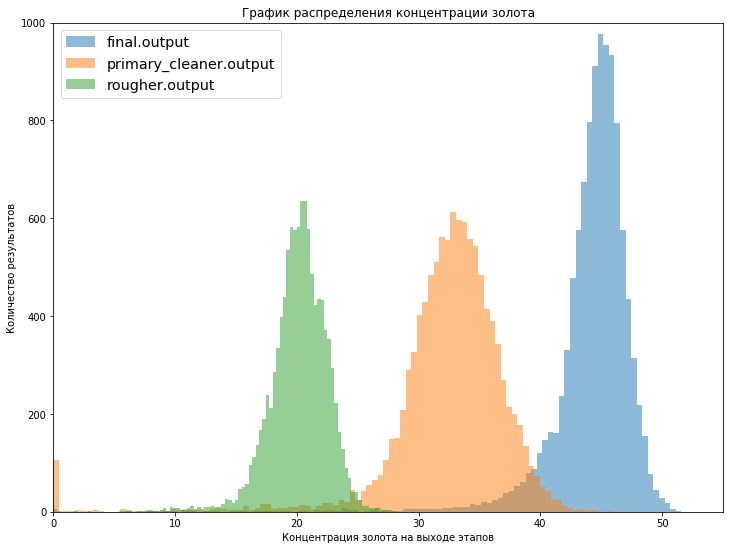

In [24]:
plt.figure(figsize=[12,9])

plt.hist(train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 1000])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения концентрации золота")
plt.show()

Мы видим, что концентрация золота повышается с каждым этапом. Целью флотации и очисток является увеличеие концентрации золота.

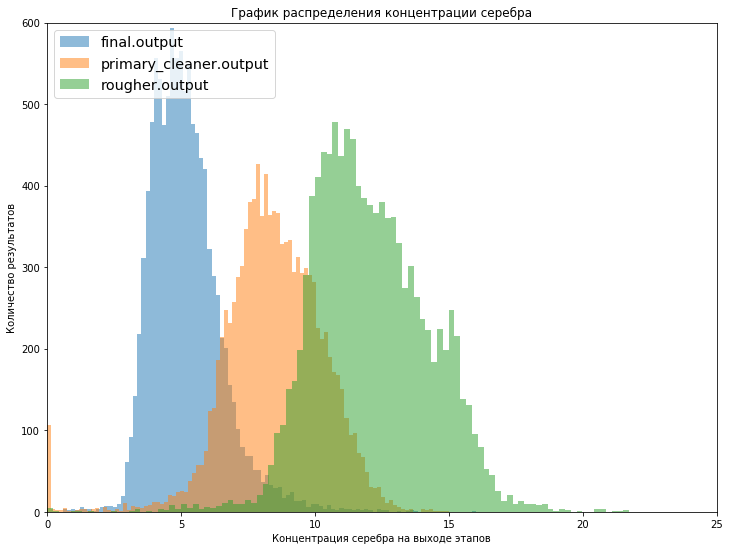

In [25]:
plt.figure(figsize=[12,9])

plt.hist(train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 600])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения концентрации серебра")
plt.show()

Конецентрация серебра понижается с каждым шагом очистки. Вместе с тем,  так как основным благородным металлом в нашем исследовании является золото, то остальные металлы и соединения должны быть отфильтрованы.

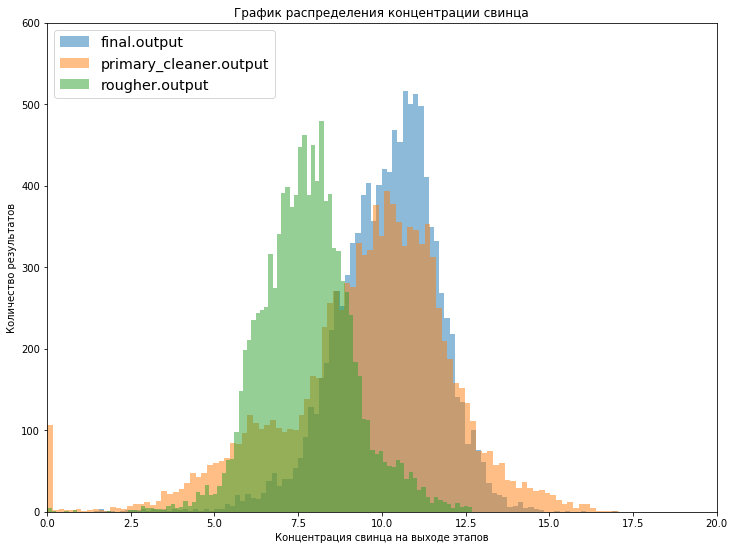

In [26]:
plt.figure(figsize=[12,9])

plt.hist(train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения концентрации свинца")
plt.show()

Концентрация свинца повышается с этапа rougher до primary_cleaner и потом усредняется. Возможно это связано с химическим процесами очистки золота. Так, при использовании азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но из-за очистки других составляющих из золотоносной руды.

Изучим размеры сырья на этапах обработки.

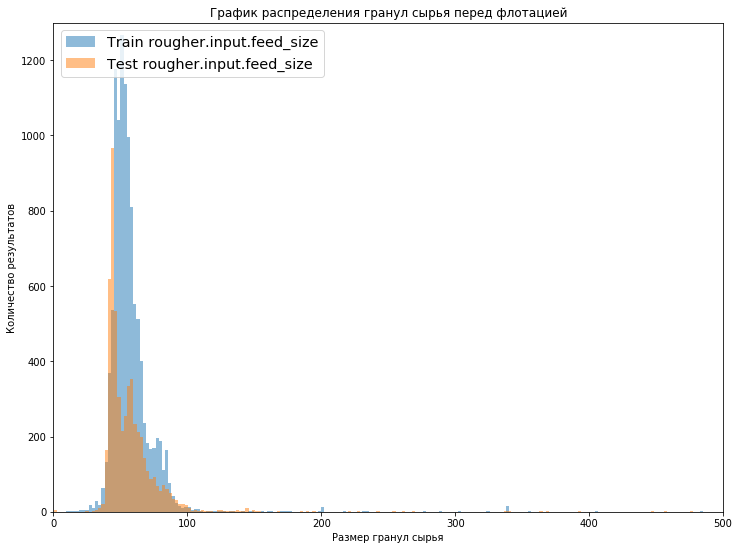

In [27]:
plt.figure(figsize=[12,9])

plt.hist(train['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(test['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Существует много выбросов после размера гранул 100.

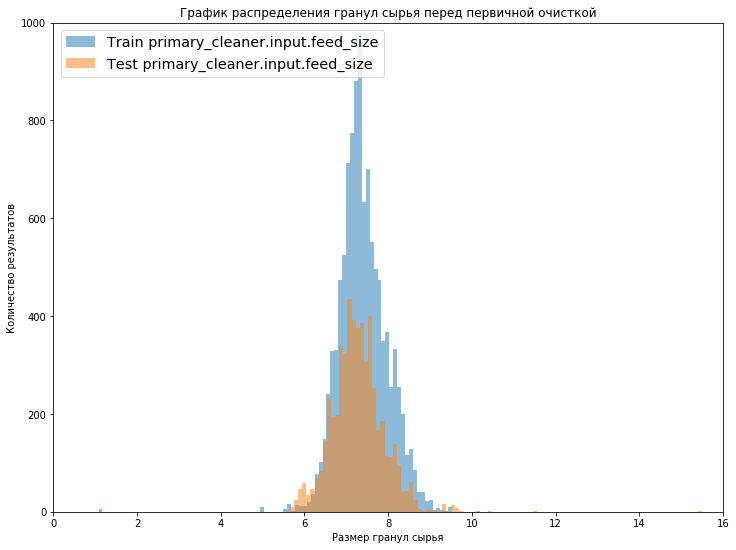

In [28]:
plt.figure(figsize=[12,9])

plt.hist(train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 16])
plt.ylim([0, 1000])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения гранул сырья перед первичной очисткой")
plt.show()


Размеры гранул перед первичной очисткой обладают нормальным распределением.

Подготовим признаки с финальными концентрациями в обучающей выборке.

In [25]:
final_output_concentrate_sum_train = (train['final.output.concentrate_au'] + 
                                      train['final.output.concentrate_ag'] + 
                                      train['final.output.concentrate_pb'] +
                                      train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (train['primary_cleaner.output.concentrate_au'] + 
                                                train['primary_cleaner.output.concentrate_ag'] + 
                                                train['primary_cleaner.output.concentrate_pb'] +
                                                train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (train['rougher.output.concentrate_au'] + 
                                        train['rougher.output.concentrate_ag'] + 
                                        train['rougher.output.concentrate_pb'] +
                                        train['rougher.output.concentrate_sol'])

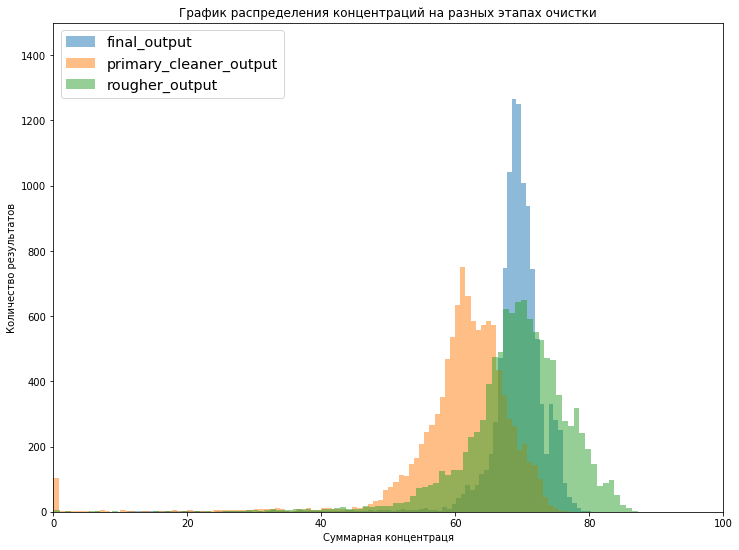

In [26]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения концентраций на разных этапах очистки")
plt.show()


По графику видно, что из аномалий много значений с нулевой суммарной концентрацией. Приблизим график.

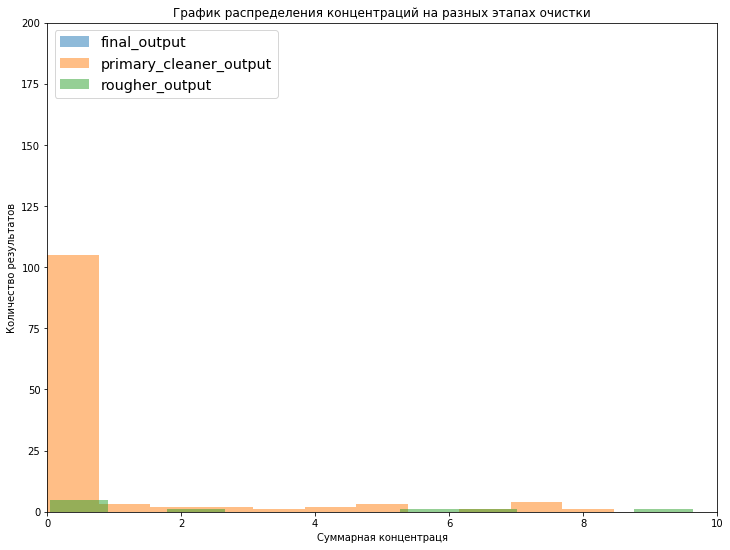

In [27]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 10])
plt.ylim([0, 200])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("График распределения концентраций на разных этапах очистки")
plt.show()

На этапе предобрабоки были найдены строки с нулевыми значениями в primary_cleaner.output. Эти же строки показывают суммарную концентрацию, равную 0, соответственно они являются аномалией, поэтому удалим их.

In [28]:
train = train.drop(train[train['primary_cleaner.output.concentrate_au'] == 0].index)
train[train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


## Выводы

В ходе выполнения 2 шага мы посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Также мы исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Описали выводы и удалили аномалии.

Мы увидели, что концентрация золота повышается с каждым этапом. Целью флотации и очисток является увеличеие концентрации золота.

Также нами отмечено, что конецентрация серебра понижается с каждым шагом очистки. Вместе с тем, нами сделан вывод, что так как основным благородным металлом в нашем исследовании является золото, то остальные металлы и соединения должны быть отфильтрованы.

Мы увидели, что концентрация свинца повышается с этапа rougher до primary_cleaner и потом усредняется. Возможно это связано с химическим процесами очистки золота. Так, при использовании азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но из-за очистки других составляющих из золотоносной руды.

Нами замечено, что распределение гранул сырья до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Существует много выбросов после размера гранул 100.

Размеры гранул перед первичной очисткой обладают нормальным распределением.

На этапе предобрабоки нами были найдены строки с нулевыми значениями в primary_cleaner.output. Эти же строки показали суммарную концентрацию, равную 0, соответственно они являются аномалией, поэтому мы их удалили.

<a id="Model"></a>
# 3. Модель

Создадим разделение признаков для предсказания rougher.output.recovery и final.output.recovery.

In [29]:
# Подготовка признаков для final.output.recovery
columns_to_delete = set(train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
# Проверка вхождения всех столбцов из features в столбцах тестовой выборки
print(set(train_features_final.columns) - set(test.columns))

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'rougher.output.concentrate_pb', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.output.recovery', 'date', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.tail_sol', 'final.output.tail_ag', 'rougher.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.tail_pb', 'final.output.recovery', 'primary_cleaner.output.tail_ag', 'final.output.concentrate_au', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_au', 'secondary_cleaner.outpu

Подготовим целевой признак.

In [30]:
train_target_final = train['final.output.recovery']
train_target_rougher = train['rougher.output.recovery']

Подготовим признаки тестовой выборки.

In [31]:
test_features = test.drop('date', axis=1)
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [32]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'secondary_cleaner.state.floatbank6_a_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank4_b_air', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.input.feed_size', 'primary_cleaner.state.floatbank8_c_air', 'secondary_cleaner.state.floatbank4_b_level', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank2_a_air', 'sec

In [34]:
test_features.shape, train_features_final.shape

((5383, 52), (10737, 52))

Функция вычисления симметричного среднего абсолютного процентного отклонения.

In [35]:
def sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final_sMAPE = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

Перед нами стоит задача регресии. Выберем следующие модели для обучения:

Линейная регрессия

Полиноминальная регрессия

Регрессия Ridge

Регрессия дерева решений

Выполним поиск лучшей модели для предсказаний.

In [36]:
%%time

regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, 
                                                               train_features_final, 
                                                               train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(regressor, train_features_final, 
                                                                train_target_final, cv=5, 
                                                                scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.19455349428688645
Mean MAE from CV of LinearRegression = -5.903842205297213
CPU times: user 1.56 s, sys: 1.35 s, total: 2.9 s
Wall time: 2.85 s


Для регрессоров Ridge и DecisionTreeRegressor применим метод GridSearchCV. В нем уже вложена кросс-валидация.

In [39]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

scores = ['r2', 'neg_mean_absolute_error']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=score)
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'alpha': 100, 'solver': 'sparse_cg'}

Grid scores on development set:

-0.236 (+/-0.480) for {'alpha': 0.1, 'solver': 'auto'}
-0.235 (+/-0.480) for {'alpha': 1, 'solver': 'auto'}
-0.235 (+/-0.484) for {'alpha': 10, 'solver': 'auto'}
-0.224 (+/-0.497) for {'alpha': 100, 'solver': 'auto'}
-0.236 (+/-0.480) for {'alpha': 0.1, 'solver': 'svd'}
-0.235 (+/-0.480) for {'alpha': 1, 'solver': 'svd'}
-0.235 (+/-0.484) for {'alpha': 10, 'solver': 'svd'}
-0.224 (+/-0.497) for {'alpha': 100, 'solver': 'svd'}
-0.236 (+/-0.480) for {'alpha': 0.1, 'solver': 'cholesky'}
-0.235 (+/-0.480) for {'alpha': 1, 'solver': 'cholesky'}
-0.235 (+/-0.484) for {'alpha': 10, 'solver': 'cholesky'}
-0.224 (+/-0.497) for {'alpha': 100, 'solver': 'cholesky'}
-0.470 (+/-0.716) for {'alpha': 0.1, 'solver': 'lsqr'}
-0.470 (+/-0.716) for {'alpha': 1, 'solver': 'lsqr'}
-0.470 (+/-0.716) for {'alpha': 10, 'solver': 'lsqr'}
-0.470 (+/-0.716) for 

In [40]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[12345]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[12345]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 2, 'random_state': 12345}

Grid scores on development set:

-0.134 (+/-0.286) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 12345}
-0.055 (+/-0.188) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 12345}
-0.276 (+/-0.141) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 12345}
-0.813 (+/-1.273) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 12345}
-0.815 (+/-0.528) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 12345}
-1.011 (+/-0.339) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 12345}
-1.014 (+/-0.344) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 12345}
-1.259 (+/-0.760) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 12345}
-1.342 (+/-0.523) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 12345}
-1.595 (+/-2.066) for {'criterion': 'mse', 'max_depth': 20, 'random_state': 12345}
-0.036

Проверим лучшие модели по метрикам на созданной метрике sMAPE. Проверим реальные данные.

In [41]:
rougher_recovery_real = full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = full.loc[test_features_final.index,'final.output.recovery']
print('Процент пропусков в общей выборке' ,rougher_recovery_real.isna().mean())
print('Процент пропусков в общей выборке',final_recovery_real.isna().mean())

Процент пропусков в общей выборке 0.14397176295745867
Процент пропусков в общей выборке 0.10477428942968604


В реальной таблице отсутсвуют зачения для выборки. Они будут игнорироваться при расчете sMAPE.

In [42]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

sMAPE для линейной регресии 12.300567079496306
sMAPE для полиноминальной регресии 25.250639724184683
sMAPE для регресии Ridge 12.26722074050842
sMAPE для DecisionTreeRegressor 12.397228650408637
CPU times: user 59.6 s, sys: 6.3 s, total: 1min 5s
Wall time: 1min 6s


Создадим константную модель на медианных значений. Изменим код функции для подсчета.

In [43]:
median_rougher_recovery = full['rougher.output.recovery'].median()
median_final_recovery = full['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 11.437793816641223


Проведем сокращение тестовой выборки из-за пропущенных значений rougher.output.recovery и final.output.recovery в полном датафрейме. Для вычисления sMAPE длина и индексы всех серий должны быть одинаковы.

In [44]:
rougher_recovery_real.dropna(inplace=True)
print('Количество строк rougher_recovery_real =', rougher_recovery_real.shape[0])
final_recovery_real.dropna(inplace=True)
print('Количество строк final_recovery_real =', final_recovery_real.shape[0])
print('Количество строк test_features_rougher =', test_features_rougher.shape[0])

not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))
print('Количество индексов с полными данными=', len(not_nan_index))

Количество строк rougher_recovery_real = 4608
Количество строк final_recovery_real = 4819
Количество строк test_features_rougher = 5383
Количество индексов с полными данными= 4554


Преобразем количество данных тестовой выбоки и рельных так, чтобы не было NaN.

In [45]:
rougher_recovery_real = full.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = full.loc[not_nan_index,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan_index,:]
test_features_final = test_features_final.loc[not_nan_index,:]
print('Количество строк test_features_final =', test_features_final.shape[0])

Количество строк test_features_final = 4554


Повторим получение sMAPE на тех же моделях.

In [46]:

%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 13.212153673716113
sMAPE для полиноминальной регресии 27.988194717599818
sMAPE для регресии Ridge 13.18546815084092
sMAPE для DecisionTreeRegressor 13.296719085879957
sMAPE для медианной константной модели 12.236756621839444
CPU times: user 56.6 s, sys: 6.05 s, total: 1min 2s
Wall time: 1min 3s


Сравним модель Ridge c медианной константной по метрикам R2 и MAE. проверим показания на final_recovery_real.

In [47]:
model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 Ridge model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE Ridge model =', mean_absolute_error(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan_index)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', mean_absolute_error(final_recovery_real, final_median_predict))

R2 Ridge model = -0.3635955874303327
MAE Ridge model = 7.785323791563485

R2 constant model = -0.16953176961687788
MAE constant model = 6.986583173406042


## Выводы

В ходе выполнения 3 шага нами была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска оптимальных гиперпараметров с помощью модуля GridSearchCV.

Так как перед нами стояла задача регресии, то мы выберали следующие модели для обучения:

Линейная регрессия

Полиноминальная регрессия

Регрессия Ridge

Регрессия дерева решений

Была отобрана лучшая модель - Ridge. Ее значение sMAPE самое низкое.

Регрессор Ridge показал себя лучше обычной линейной регресии. sMAPE показал 12.27 до того как убрать пропущенные значения, и 13.19 после. Если сравнивать с константной моделью, значение проигрывает на 0.83 и 0.95 соответсвенно. Другие метрики тоже говорят о том, что константная модель адекватнее выбранной

После удаления значений NaN модель изменила свои значения. В  общей выборке отсутвует 14% и 10% данных по предсказаниям, возможно это повлияло на качество модели.

<a id="Conclusion"></a>
# 4. Общий вывод

* В ходе выполнения первого шага мы сделали нижеледующее.

Нами открыты и изучены файлы, сохранены в соответствующих датафреймах под назваиями full, train, test.

Во всех полученных датафреймах мы обнаружили пропущенные знаачения.

Пропуски в вышеуказанных наборах информациии имеются скорее всего потому, что даные значения еще неизвестны и будут измеряться позже.

Далее нами рассчитана эффективность обогащения чернового концентрата rougher.output.recovery из обучающей выборки, при этом предварительно мы удалили пропуски из столбцов с пропусками.

Получив значение абсолютной средней ошибки = 1.0512313043960013e-14, нами сделан вывод, что значение MAE имеет очень малое отклонение, поэтому расчетное значение rougher.output.recovery совпадает со значением признака.

Далее мы удалили пропуски в обучающей и тестовой выборке.

Мы обнаружили, что в тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Нами сделан вывод, что эти данные будут получены по результатам технологического процесса, поэтому эти признаки мы отнесли к онлайн метрикам. Остальные признаки исторически известны, соответственно их мы отнесли к оффлайн метрикам.

Также мы выделили признаки из тестовой выборки, по которым будет обучаться модель. Мы обозначили, что признак date не несет смысла для обучающей модели, а также, что для предсказания rougher.output.recovery будут использоватся данные из столюцов этапа rougher, а Для вычисления final.output.recovery будут использованы все признаки из тестовой выборки.

Далее мы визуально рассмотрели ключевые признаки в обучающей выборке и изучили нулевые значения в столбце rougher.output.recovery.

Неподходящие данные были удалены.

Данные подготовлены к дальнейшему анализу.

* В ходе выполнения 2 шага мы посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Также мы исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Описали выводы и удалили аномалии.

Мы увидели, что концентрация золота повышается с каждым этапом. Целью флотации и очисток является увеличеие концентрации золота.

Также нами отмечено, что конецентрация серебра понижается с каждым шагом очистки. Вместе с тем, нами сделан вывод, что так как основным благородным металлом в нашем исследовании является золото, то остальные металлы и соединения должны быть отфильтрованы.

Мы увидели, что концентрация свинца повышается с этапа rougher до primary_cleaner и потом усредняется. Возможно это связано с химическим процесами очистки золота. Так, при использовании азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но из-за очистки других составляющих из золотоносной руды.

Нами замечено, что распределение гранул сырья до флотации похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Существует много выбросов после размера гранул 100.

Размеры гранул перед первичной очисткой обладают нормальным распределением.

На этапе предобрабоки нами были найдены строки с нулевыми значениями в primary_cleaner.output. Эти же строки показали суммарную концентрацию, равную 0, соответственно они являются аномалией, поэтому мы их удалили.

* В ходе выполнения 3 шага нами была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска оптимальных гиперпараметров с помощью модуля GridSearchCV.

Так как перед нами стояла задача регресии, то мы выберали следующие модели для обучения:

Линейная регрессия

Полиноминальная регрессия

Регрессия Ridge

Регрессия дерева решений

Была отобрана лучшая модель - Ridge. Ее значение sMAPE самое низкое.

Регрессор Ridge показал себя лучше обычной линейной регресии. sMAPE показал 12.27 до того как убрать пропущенные значения, и 13.19 после. Если сравнивать с константной моделью, значение проигрывает на 0.83 и 0.95 соответсвенно. Другие метрики тоже говорят о том, что константная модель адекватнее выбранной

После удаления значений NaN модель изменила свои значения. В  общей выборке отсутвует 14% и 10% данных по предсказаниям, возможно это повлияло на качество модели.